## 二维Stewart平台问题
已知平台三角形三边长度$L_1,L_2,L_3$，$L_1$所对角$\gamma$，三个可伸缩的支杆的定端坐标$(0,0), (x_1,0), (x_2,y_2)$，在给定支杆长度$p_1,p_2,p_3$，求解$L_3$和x轴正半轴夹角$\theta$和$L_1$所对平台端点$(x,y)$。

In [35]:
import matplotlib.pyplot as plt
import numpy as np

$$
\begin{aligned}
p_1^2&=x^2+y^2 \\
p_2^2&=(x+A_2)^2+(y+B_2)^2 \\
p_3^2&=(x+A_3)^2+(y+B_3)^2 \\
\text{while}\qquad\\
A_2&=L_3\cos\theta-x_1 \\
B_2&=L_3\sin\theta \\
A_3&=L_2\cos{(\theta+\gamma)}-x_2=L_2[\cos\theta\cos\gamma-\sin\theta\sin\gamma]-x_2 \\
B_3&=L_2\sin{(\theta+\gamma)}-y_2=L_2[\cos\theta\sin\gamma+\sin\theta\cos\gamma]-y_2 \\
\text{then}\qquad\\
p_2^2&=p_1^2+2A_2x+2B_2y+A_2^2+B_2^2 \\
p_3^2&=p_1^2+2A_3x+2B_3y+A_3^2+B_3^2 \\
\text{as long as}\qquad\\
D&=2(A_2B_3-B_2A_3)\neq0 \\
\text{then}\qquad\\
x&=\frac{B_3(p_2^2-p_1^2-A_2^2-B_2^2)-B_2(p_3^2-p_1^2-A_3^2-B_3^2)}{2(A_2B_3-B_2A_3)}=\frac{N_1}{D} \\
y&=\frac{-A_3(p_2^2-p_1^2-A_2^2-B_2^2)+A_2(p_3^2-p_1^2-A_3^2-B_3^2)}{2(A_2B_3-B_2A_3)}=\frac{N_2}{D} \\
\text{Put x, y into the first formula}\qquad\\
f(\theta)&=N_1^2+N_2^2-p_1^2D^2,\;x\in[-\pi,\pi]\\
\text{Let f=0, then solve the equation.}\qquad
\end{aligned}
$$

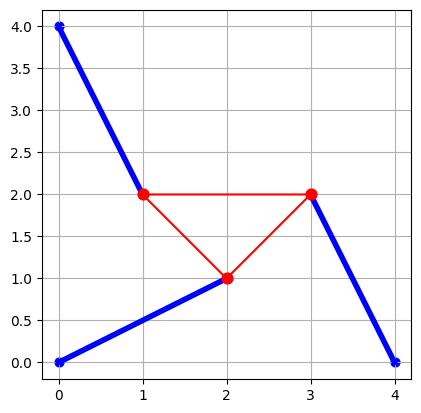

In [39]:
P0 = (0, 0)
P1 = (4, 0)
P2 = (0, 4)
L1, L2, L3 = 2, np.sqrt(2), np.sqrt(2)
gamma = np.arccos((L2**2+L3**2-L1**2)/(2*L2*L3))

def draw(L1, L2, L3, P0, P1, P2, p1, p2, p3, theta, gamma):
    A2 = L3*np.cos(theta)-P1[0]
    B2 = L3*np.sin(theta)
    A3 = L2*np.cos(theta+gamma)-P2[0]
    B3 = L2*np.sin(theta+gamma)-P2[1]
    try:
        D = 2*(A2*B3-B2*A3)
    except ZeroDivisionError:
        print("ZeroDivisionError")
        return None
    N1 = B3*(p2**2-p1**2-A2**2-B2**2)-B2*(p3**2-p1**2-A3**2-B3**2)
    N2 = -A3*(p2**2-p1**2-A2**2-B2**2)+A2*(p3**2-p1**2-A3**2-B3**2)
    T = (N1/D, N2/D)

    T2 = (T[0]+L3*np.cos(theta), T[1]+L3*np.sin(theta))
    T3 = (T[0]+L2*np.cos(theta+gamma), T[1]+L2*np.sin(theta+gamma))
    plt.plot([T[0], T2[0], T3[0], T[0]], [T[1], T2[1], T3[1], T[1]], c='r')
    plt.plot([P0[0],  T[0]], [P0[1],  T[1]], c='b', linewidth=4)
    plt.plot([P1[0], T2[0]], [P1[1], T2[1]], c='b', linewidth=4)
    plt.plot([P2[0], T3[0]], [P2[1], T3[1]], c='b', linewidth=4)
    plt.scatter([T[0], T2[0], T3[0]], [T[1], T2[1], T3[1]], c='r', s=60, zorder=4)
    plt.scatter([P0[0], P1[0], P2[0]], [P0[1], P1[1], P2[1]], c='b', s=40)

    # plt.ylim(-30, 10)
    axes = plt.gca()
    axes.grid()
    axes.set_aspect(1)
    plt.show()

p1 = np.sqrt(5)
p2 = p1
p3 = p1
draw(L1, L2, L3, P0, P1, P2, p1, p2, p3, np.pi/4, gamma)

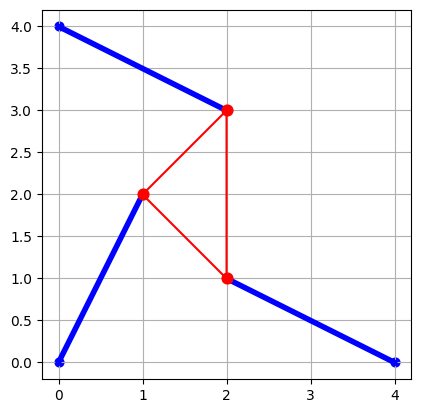

In [40]:
draw(L1, L2, L3, P0, P1, P2, p1, p2, p3, -np.pi/4, gamma)

In [30]:
def FWrapper(p1, p2, p3):
    def F(theta):
        A2 = L3*np.cos(theta)-P1[0]
        B2 = L3*np.sin(theta)
        A3 = L2*np.cos(theta+gamma)-P2[0]
        B3 = L2*np.sin(theta+gamma)-P2[1]
        try:
            D = 2*(A2*B3-B2*A3)
        except ZeroDivisionError:
            print("ZeroDivisionError")
            return None
        N1 = B3*(p2**2-p1**2-A2**2-B2**2)-B2*(p3**2-p1**2-A3**2-B3**2)
        N2 = -A3*(p2**2-p1**2-A2**2-B2**2)+A2*(p3**2-p1**2-A3**2-B3**2)
        return N1**2+N2**2-p1**2*D**2
    return F

1. 略
2. 画出区间 $[-\pi,\pi]$ 上的 $f(\theta)$。

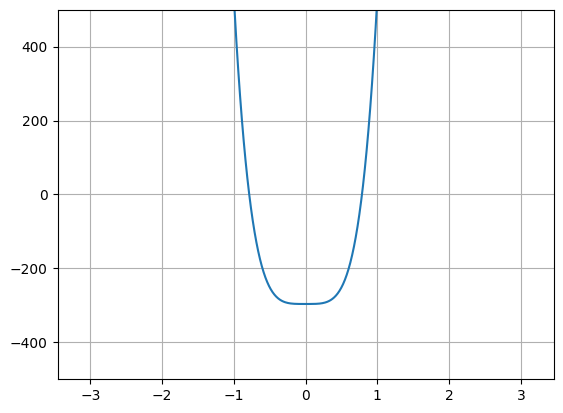

In [43]:
f = FWrapper(p1, p2, p3)
X = np.linspace(-np.pi, np.pi, 500)
plt.plot(X, f(X))
plt.ylim(-500, 500)
axes = plt.gca()
axes.grid()
plt.show()